# Milestone 2 - Modelling and further EDA

## Note:
1. Certain cells appear redundant but have been included as they might be referenced in a later part of the notebook.
2. Comments will be added in the form of markdown cells as well and code comments starting with '#'. They are present to help clarify certain choices
3. Requirements are provided in requirements.txt

In [1]:
import numpy as np
import pandas as pd
from sklearn.metrics import classification_report
import lightgbm as lgbm
import xgboost as xgb
from sklearn.model_selection import train_test_split

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
from imblearn.under_sampling import RandomUnderSampler

Note: You may be asked to install visual studio while trying to install Annoy on windows 10

In [4]:
from sklearn.neighbors import KNeighborsClassifier

In [5]:
import annoy

## Note:
The datasets with the name "recleaned_data_stdscle" have very little difference between them. v1 had everything run through the standard scaler, while v2 made some omissions, i.e. avoiding scaling the one-hot variables. v2_wartists has the artist column included for later analysis.

In [6]:
df_data_main = pd.read_csv('data/recleaned_data_stdscle_v2_wartists.csv')
df_data = df_data_main.copy()

In [7]:
df_data

,acousticness,artists,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,...,key_3,key_4,key_5,key_6,key_7,key_8,key_9,key_10,key_11,decade
0,1.290829,['Mamie Smith'],0.343090,-0.586049,-0.946776,0,-0.578414,5,0.929594,-0.152122,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1920
1,1.277648,['Dick Haymes'],-1.888467,-0.431375,-0.909987,0,1.401622,8,0.123664,-0.645386,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1920
2,1.298737,['Dick Haymes'],-0.835630,-0.620337,-1.299951,0,-0.117816,2,-0.630575,-0.608907,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1920
3,1.293465,['Dick Haymes'],-1.110283,-0.554578,-1.049785,0,-0.566669,0,-0.304312,-0.388445,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1920
4,1.027206,"['ST', '98', 'R2S', 'Niklas O']",-0.732635,-0.434248,-0.681894,1,-0.579976,0,-0.671149,-0.372584,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1920
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
157099,1.269739,"['Mysterious World Music', 'Relaxing Zen Music...",1.355874,-0.097726,-1.685132,0,1.797341,6,-0.812326,-0.987093,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2020
157100,1.280284,"['Mysterious World Music', 'Relaxing Zen Music...",1.538976,-0.424418,-1.635099,0,1.939316,7,0.045850,-0.355314,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2020
157101,0.905940,"['Mysterious World Music', 'Relaxing Zen Music...",-1.877023,-0.803343,-1.755951,0,2.211184,1,-0.548870,-2.522573,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2020
157102,1.296101,"['Mysterious World Music', 'Relaxing Zen Music...",0.634909,-0.293801,-1.702055,0,2.190039,3,-0.724508,-1.644778,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2020


In [8]:
df_data = df_data[df_data.decade != 2020]
labels = df_data['decade']
popularity = df_data['popularity']
df_data = df_data.drop(columns = ['year', 'decade', 'popularity', 'artists'])

In [9]:
X_train, X_test, y_train, y_test = train_test_split(df_data, labels, test_size=0.20, random_state=2)

In [10]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((122267, 25), (30567, 25), (122267,), (30567,))

## 1. Modelling

In [11]:
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

### 1.1 KNN Classifier

In [12]:
#KNN classifier
classifier = KNeighborsClassifier(n_neighbors=27)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
# from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

        1920       0.46      0.29      0.36      1058
        1930       0.43      0.37      0.40      2002
        1940       0.35      0.43      0.38      2804
        1950       0.31      0.43      0.36      3643
        1960       0.32      0.41      0.36      3525
        1970       0.32      0.34      0.33      3632
        1980       0.35      0.32      0.33      3663
        1990       0.33      0.26      0.29      3727
        2000       0.31      0.16      0.21      2445
        2010       0.52      0.49      0.50      4068

    accuracy                           0.36     30567
   macro avg       0.37      0.35      0.35     30567
weighted avg       0.36      0.36      0.36     30567

0.3593417738083554


In [13]:
cr_df = pd.DataFrame(classification_report(y_test, y_pred, output_dict=True))
cr_df

,1920,1930,1940,1950,1960,1970,1980,1990,2000,2010,accuracy,macro avg,weighted avg
precision,0.461078,0.429804,0.349183,0.305637,0.323476,0.323966,0.345838,0.330444,0.306464,0.518586,0.359342,0.369448,0.363628
recall,0.291115,0.373127,0.426890,0.427121,0.406525,0.342786,0.322140,0.255702,0.157055,0.486971,0.359342,0.348943,0.359342
f1-score,0.356895,0.399465,0.384146,0.356309,0.360277,0.333110,0.333569,0.288307,0.207680,0.502282,0.359342,0.352204,0.355932
support,1058.000000,2002.000000,2804.000000,3643.000000,3525.000000,3632.000000,3663.000000,3727.000000,2445.000000,4068.000000,0.359342,30567.000000,30567.000000


### 1.2 Tree Based Models

In [ ]:
model_lgbm = lgbm.LGBMClassifier(random_state=2)
model_xgb = xgb.XGBClassifier(random_state=2)
rfc = RandomForestClassifier(random_state=2)

global models 

models = [model_lgbm, model_xgb, rfc]

def test_model_results(X_train, X_test, y_train, y_test):
    
    result = {}
    
    for model in models:
    
        model.fit(X_train, y_train)
        model.score(X_test, y_test)
        y_pred = model.predict(X_test)
        result[type(model).__name__] = accuracy_score(y_test, y_pred)
    
    return result

In [14]:
results = test_model_results(X_train, X_test, y_train, y_test)

print(results)

C:\Users\kradk\anaconda3\envs\mldl\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:22:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
{'LGBMClassifier': 0.44237249321163347, 'XGBClassifier': 0.44335394379559656, 'RandomForestClassifier': 0.4438773841070435}


### 1.2.1 LGBM results

In [15]:
y_pred = models[0].predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

        1920       0.69      0.48      0.57      1058
        1930       0.59      0.45      0.51      2002
        1940       0.46      0.52      0.49      2804
        1950       0.38      0.50      0.43      3643
        1960       0.39      0.48      0.43      3525
        1970       0.38      0.41      0.39      3632
        1980       0.43      0.38      0.40      3663
        1990       0.41      0.32      0.36      3727
        2000       0.40      0.26      0.31      2445
        2010       0.57      0.60      0.58      4068

    accuracy                           0.44     30567
   macro avg       0.47      0.44      0.45     30567
weighted avg       0.45      0.44      0.44     30567



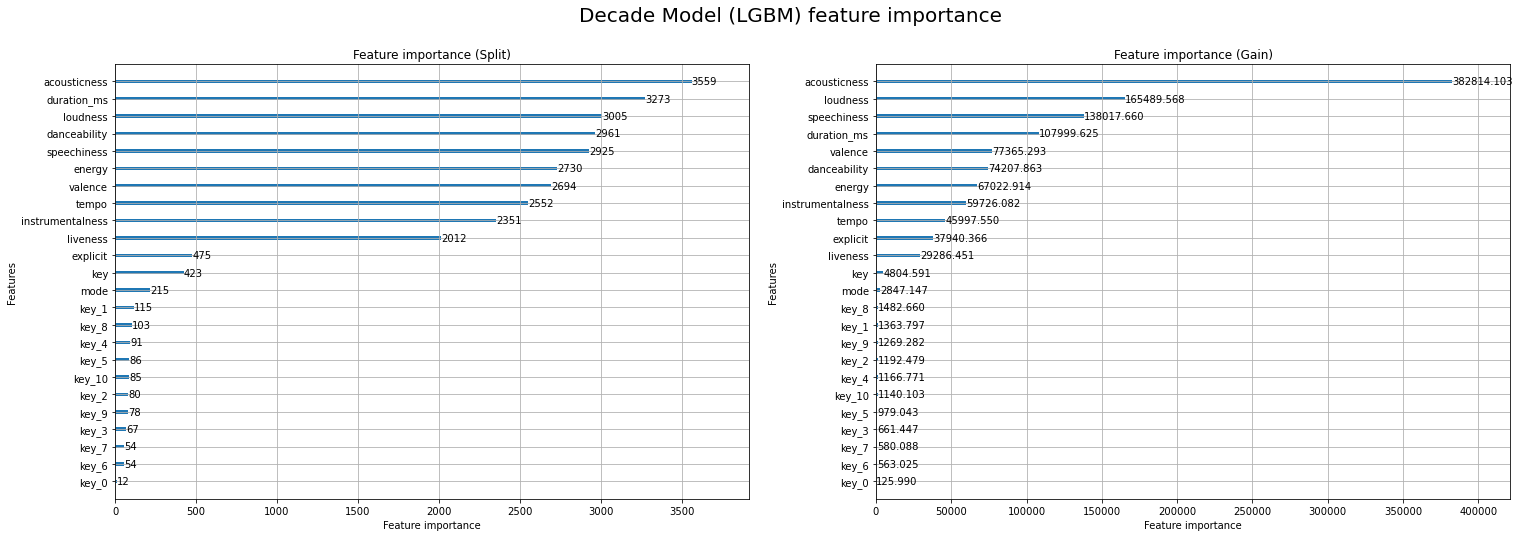

In [16]:
fig, axs = plt.subplots(1,2, figsize=(25,8))
fig.suptitle('Decade Model (LGBM) feature importance', fontsize=20)
# fig, axs = plt)
lgbm.plot_importance(models[0],axs[0], importance_type='split', title='Feature importance (Split)');
lgbm.plot_importance(models[0],axs[1], importance_type='gain', title='Feature importance (Gain)');

In [17]:
lgbm_df = pd.DataFrame(classification_report(y_test, y_pred, output_dict=True))
lgbm_df

,1920,1930,1940,1950,1960,1970,1980,1990,2000,2010,accuracy,macro avg,weighted avg
precision,0.694708,0.586842,0.457654,0.376901,0.391755,0.379985,0.428267,0.405350,0.399496,0.571799,0.442372,0.469276,0.448508
recall,0.483932,0.445554,0.520328,0.503431,0.482553,0.406663,0.383838,0.317145,0.259305,0.596116,0.442372,0.439887,0.442372
f1-score,0.570474,0.506530,0.486983,0.431073,0.432439,0.392871,0.404837,0.355863,0.314484,0.583704,0.442372,0.447926,0.440260
support,1058.000000,2002.000000,2804.000000,3643.000000,3525.000000,3632.000000,3663.000000,3727.000000,2445.000000,4068.000000,0.442372,30567.000000,30567.000000


### 1.2.2 XGBoost Results

In [18]:
y_pred = models[1].predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

        1920       0.71      0.49      0.58      1058
        1930       0.56      0.45      0.50      2002
        1940       0.45      0.50      0.47      2804
        1950       0.38      0.50      0.44      3643
        1960       0.39      0.47      0.43      3525
        1970       0.38      0.41      0.40      3632
        1980       0.43      0.39      0.41      3663
        1990       0.41      0.33      0.36      3727
        2000       0.39      0.26      0.31      2445
        2010       0.58      0.60      0.59      4068

    accuracy                           0.44     30567
   macro avg       0.47      0.44      0.45     30567
weighted avg       0.45      0.44      0.44     30567



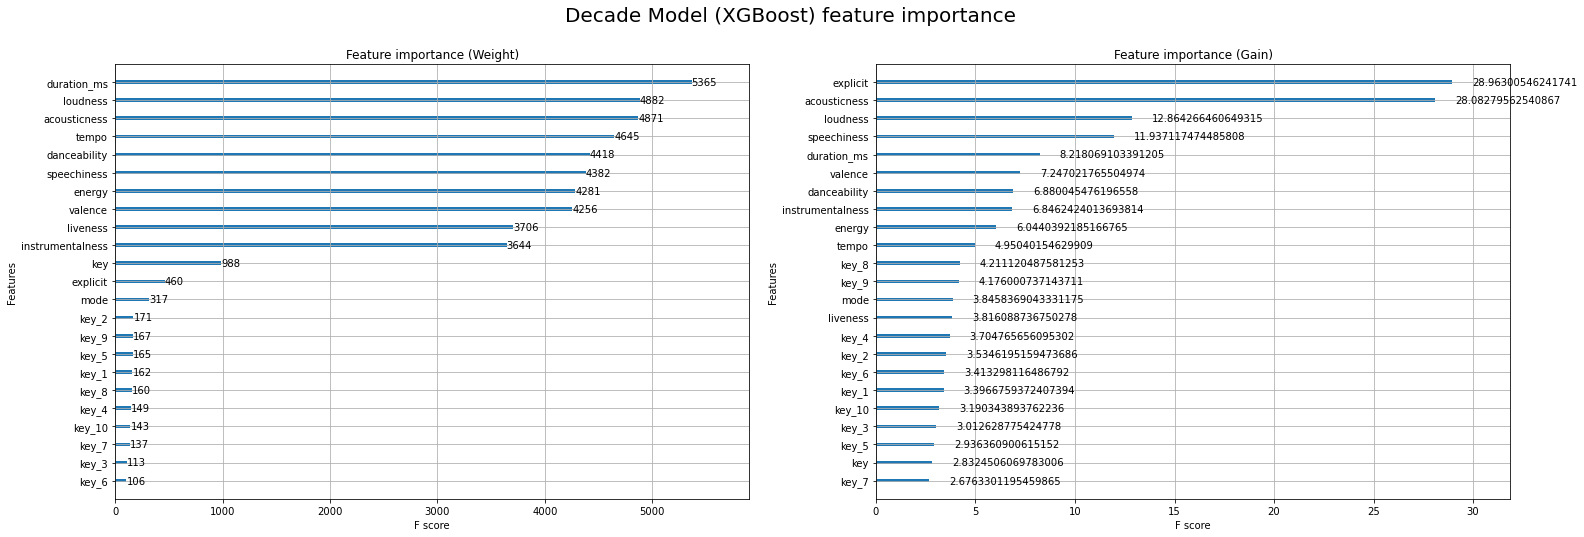

In [19]:
# xgb.plot_importance(models[1])
fig, axs = plt.subplots(1,2, figsize=(25,8))
fig.suptitle('Decade Model (XGBoost) feature importance', fontsize=20)
# fig, axs = plt)
xgb.plot_importance(models[1],axs[0], importance_type='weight', title='Feature importance (Weight)');
xgb.plot_importance(models[1],axs[1], importance_type='gain', title='Feature importance (Gain)');

In [20]:
xgb_df = pd.DataFrame(classification_report(y_test, y_pred, output_dict=True))
xgb_df

,1920,1930,1940,1950,1960,1970,1980,1990,2000,2010,accuracy,macro avg,weighted avg
precision,0.708219,0.564038,0.448947,0.384631,0.389216,0.384341,0.426273,0.406942,0.394885,0.582955,0.443354,0.469045,0.448900
recall,0.488658,0.446553,0.501783,0.504255,0.468936,0.414923,0.390663,0.330292,0.258896,0.600295,0.443354,0.440525,0.443354
f1-score,0.578300,0.498467,0.473897,0.436394,0.425373,0.399047,0.407692,0.364633,0.312747,0.591498,0.443354,0.448805,0.441665
support,1058.000000,2002.000000,2804.000000,3643.000000,3525.000000,3632.000000,3663.000000,3727.000000,2445.000000,4068.000000,0.443354,30567.000000,30567.000000


### 1.2.3 Random Forest Results

In [21]:
y_pred = models[2].predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

        1920       0.80      0.47      0.59      1058
        1930       0.59      0.45      0.51      2002
        1940       0.45      0.52      0.48      2804
        1950       0.38      0.53      0.45      3643
        1960       0.39      0.48      0.43      3525
        1970       0.37      0.39      0.38      3632
        1980       0.43      0.40      0.41      3663
        1990       0.41      0.31      0.35      3727
        2000       0.41      0.24      0.30      2445
        2010       0.57      0.60      0.59      4068

    accuracy                           0.44     30567
   macro avg       0.48      0.44      0.45     30567
weighted avg       0.45      0.44      0.44     30567



Text(0.5, 0, 'Relative Importance')

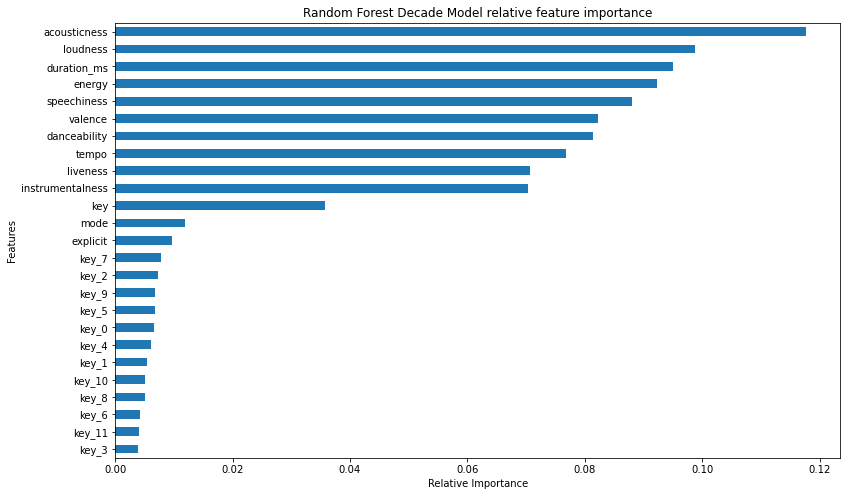

In [22]:
# models[2].feature_importances_
fig, ax= plt.subplots(figsize=(13,8))
feat_importances = pd.Series(models[2].feature_importances_, index=X_test.columns).sort_values(ascending=True)
feat_importances.plot(kind='barh', title='Random Forest Decade Model relative feature importance', ax=ax);

ax.set_ylabel('Features'); ax.set_xlabel('Relative Importance')

In [23]:
rf_df = pd.DataFrame(classification_report(y_test, y_pred, output_dict=True))
rf_df

,1920,1930,1940,1950,1960,1970,1980,1990,2000,2010,accuracy,macro avg,weighted avg
precision,0.796502,0.594810,0.451923,0.382475,0.388914,0.374640,0.425763,0.406732,0.411683,0.574009,0.443877,0.480745,0.452866
recall,0.473535,0.446553,0.519615,0.531979,0.481702,0.393722,0.396123,0.311242,0.242127,0.601524,0.443877,0.439812,0.443877
f1-score,0.593954,0.510128,0.483411,0.445006,0.430364,0.383944,0.410409,0.352637,0.304919,0.587444,0.443877,0.450222,0.441348
support,1058.000000,2002.000000,2804.000000,3643.000000,3525.000000,3632.000000,3663.000000,3727.000000,2445.000000,4068.000000,0.443877,30567.000000,30567.000000


## 2. Finding centroids

In [24]:
df_prediction = X_test.copy()
df_prediction['decade'] = y_test
df_prediction['prediction'] = y_pred

In [25]:
#Extract only the True Positive
#Interested in finding the characteristics of each decade as defined by the true positives (songs which shared similar characteristics and hence cluster close to one other.)
df_prediction.decade.astype(int)
df_prediction.prediction.astype(int)
df_TP = df_prediction[df_prediction['decade'] == df_prediction['prediction']]

In [26]:
arr = np.zeros((df_data.shape[0]),dtype=bool)
arr
arr[df_TP.index] = True
arr.sum()
df_data['Test True Positives'] = arr

### 2.1 Feature boxplots - Distribution across decades (True Positives)

Text(0, 0.5, 'Standardised Value')

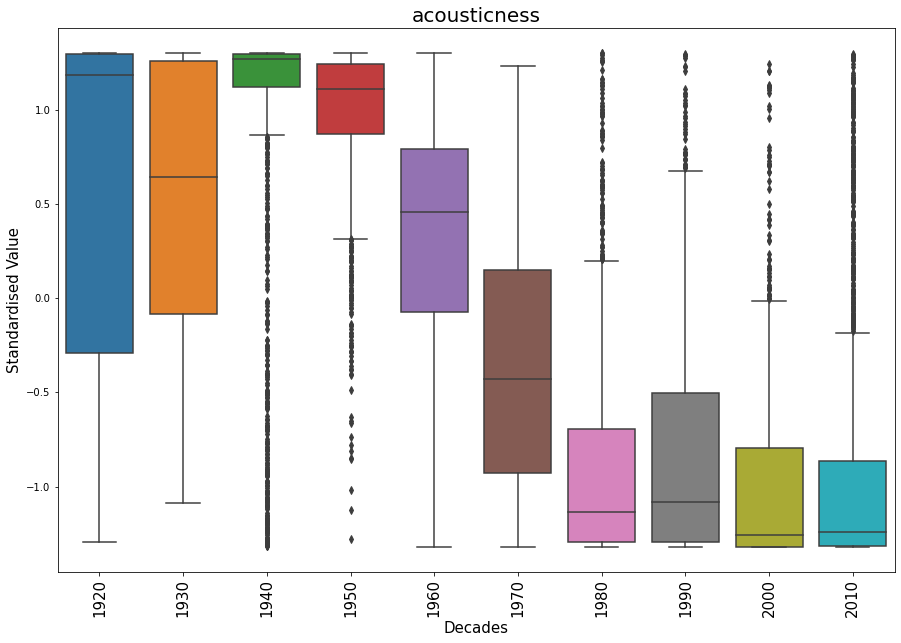

In [27]:
plt.figure(figsize=(15,10))
feature = df_TP.columns[0]
data = df_TP[[feature ,'decade']]
ax = sns.boxplot(x="decade", y=feature, data=data)
plt.xticks(rotation=90, fontsize = 15);
ax.set_title(feature , fontsize = 20)
ax.set_xlabel('Decades' , fontsize=15)
ax.set_ylabel('Standardised Value' , fontsize=15)

Text(0, 0.5, 'Standardised Value')

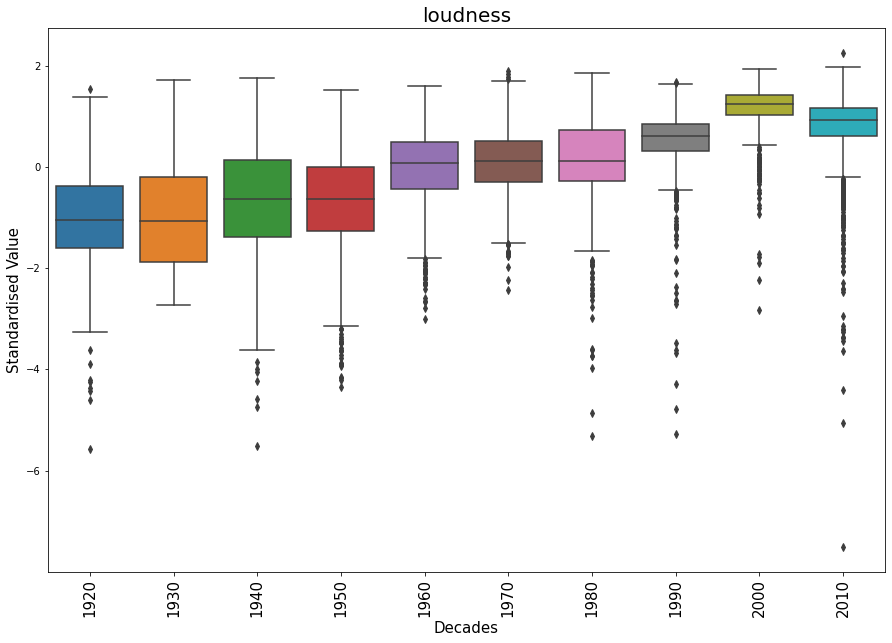

In [28]:
plt.figure(figsize=(15,10))
feature = df_TP.columns[8]
data = df_TP[[feature ,'decade']]
ax = sns.boxplot(x="decade", y=feature, data=data)
plt.xticks(rotation=90, fontsize = 15);
ax.set_title(feature , fontsize = 20)
ax.set_xlabel('Decades' , fontsize=15)
ax.set_ylabel('Standardised Value' , fontsize=15)

Text(0, 0.5, 'Standardised Value')

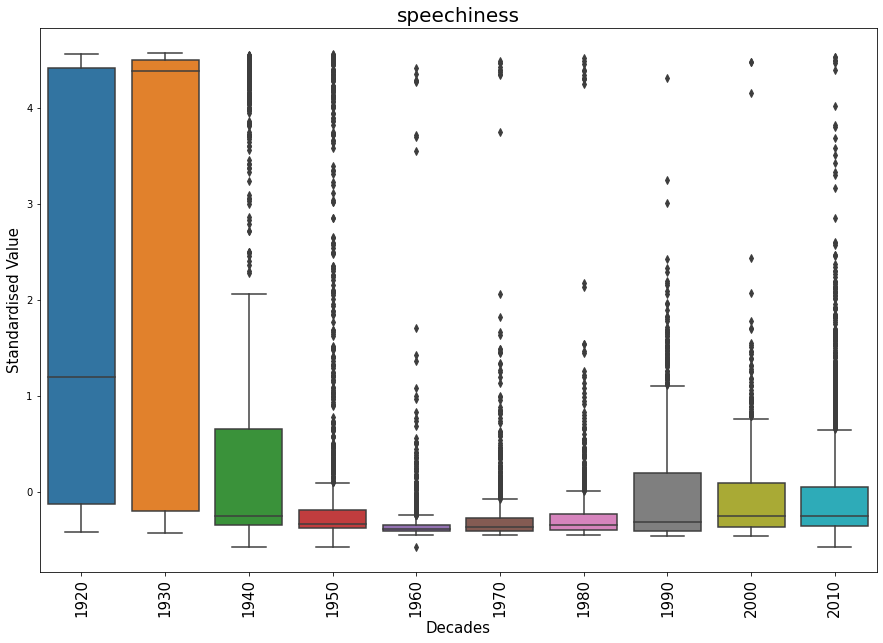

In [29]:
plt.figure(figsize=(15,10))
feature = df_TP.columns[10]
data = df_TP[[feature ,'decade']]
ax = sns.boxplot(x="decade", y=feature, data=data)
plt.xticks(rotation=90, fontsize= 15);
ax.set_title(feature , fontsize = 20)
ax.set_xlabel('Decades' , fontsize=15)
ax.set_ylabel('Standardised Value' , fontsize=15)

Text(0, 0.5, 'Standardised Value')

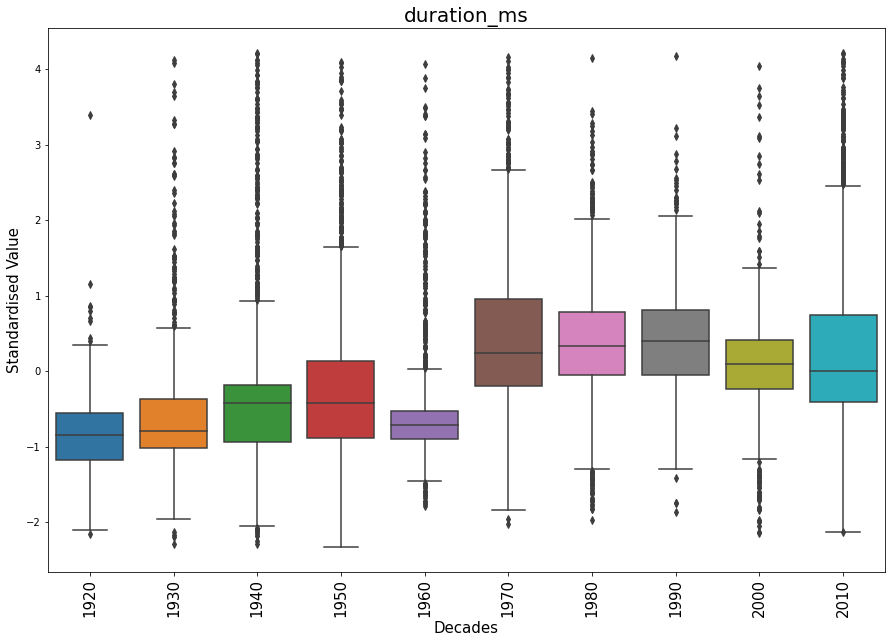

In [30]:
plt.figure(figsize=(15,10))
feature = df_TP.columns[2]
data = df_TP[[feature ,'decade']]
ax = sns.boxplot(x="decade", y=feature, data=data)
plt.xticks(rotation=90, fontsize = 15);
ax.set_title(feature , fontsize = 20)
ax.set_xlabel('Decades' , fontsize=15)
ax.set_ylabel('Standardised Value' , fontsize=15)

Text(0, 0.5, 'Standardised Value')

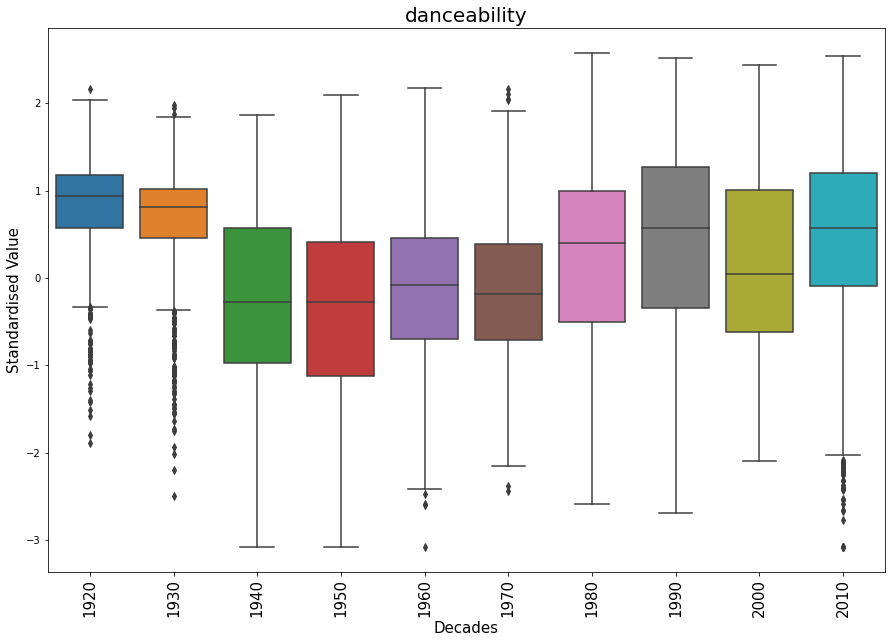

In [31]:
plt.figure(figsize=(15,10))
feature = df_TP.columns[1]
data = df_TP[[feature ,'decade']]
ax = sns.boxplot(x="decade", y=feature, data=data)
plt.xticks(rotation=90, fontsize = 15);
ax.set_title(feature , fontsize = 20)
ax.set_xlabel('Decades' , fontsize=15)
ax.set_ylabel('Standardised Value' , fontsize=15)

Text(0, 0.5, 'Standardised Value')

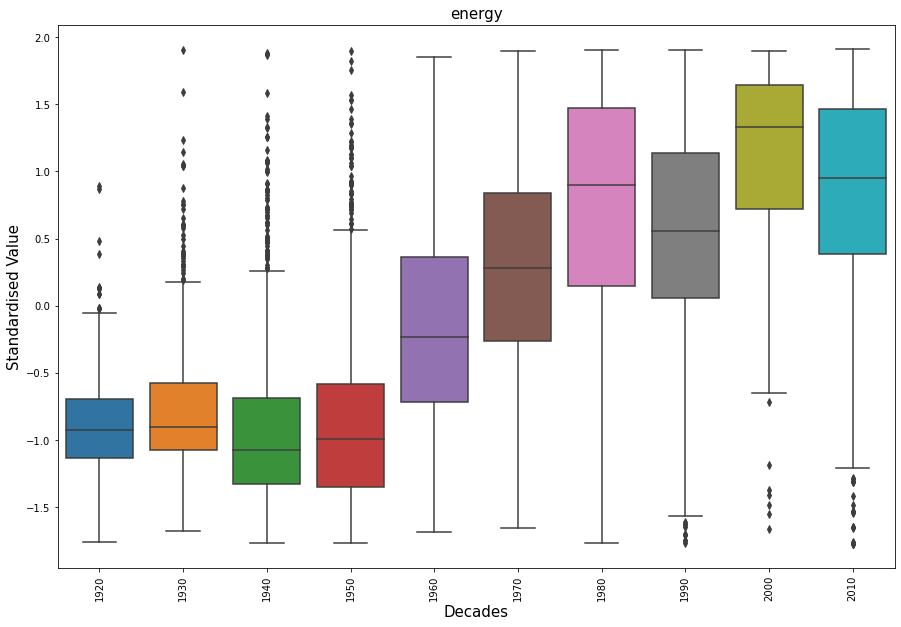

In [32]:
plt.figure(figsize=(15,10))
feature = df_TP.columns[3]
data = df_TP[[feature ,'decade']]
ax = sns.boxplot(x="decade", y=feature, data=data)
plt.xticks(rotation=90);
ax.set_title(feature , fontsize = 15)
ax.set_xlabel('Decades' , fontsize=15)
ax.set_ylabel('Standardised Value' , fontsize=15)

Text(0, 0.5, 'Standardised Value')

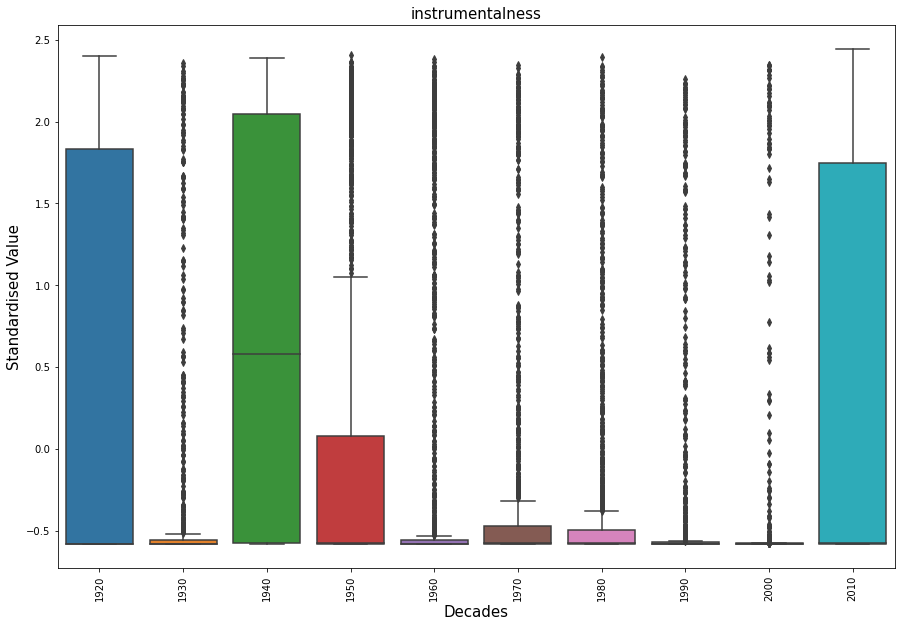

In [33]:
plt.figure(figsize=(15,10))
feature = df_TP.columns[5]
data = df_TP[[feature ,'decade']]
ax = sns.boxplot(x="decade", y=feature, data=data)
plt.xticks(rotation=90);
ax.set_title(feature , fontsize = 15)
ax.set_xlabel('Decades' , fontsize=15)
ax.set_ylabel('Standardised Value' , fontsize=15)

Text(0, 0.5, 'Standardised Value')

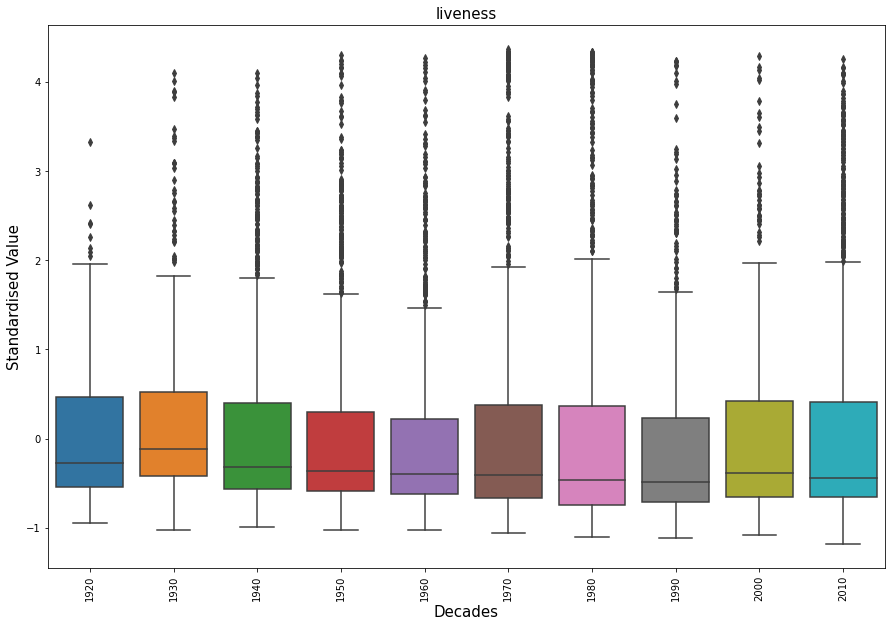

In [34]:
plt.figure(figsize=(15,10))
feature = df_TP.columns[7]
data = df_TP[[feature ,'decade']]
ax = sns.boxplot(x="decade", y=feature, data=data)
plt.xticks(rotation=90);
ax.set_title(feature , fontsize = 15)
ax.set_xlabel('Decades' , fontsize=15)
ax.set_ylabel('Standardised Value' , fontsize=15)

Text(0, 0.5, 'Standardised Value')

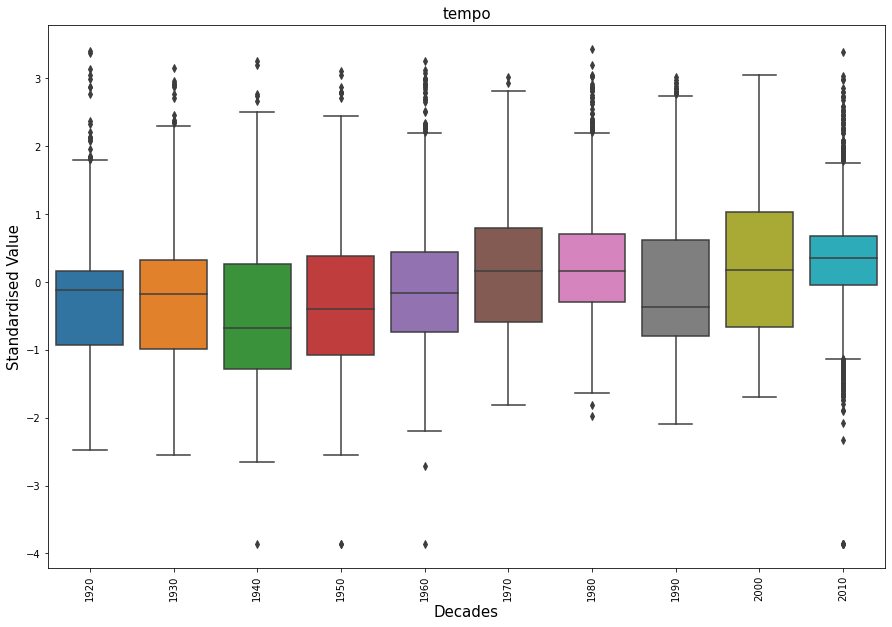

In [35]:
plt.figure(figsize=(15,10))
feature = df_TP.columns[11]
data = df_TP[[feature ,'decade']]
ax = sns.boxplot(x="decade", y=feature, data=data)
plt.xticks(rotation=90);
ax.set_title(feature , fontsize = 15)
ax.set_xlabel('Decades' , fontsize=15)
ax.set_ylabel('Standardised Value' , fontsize=15)

Text(0, 0.5, 'Standardised Value')

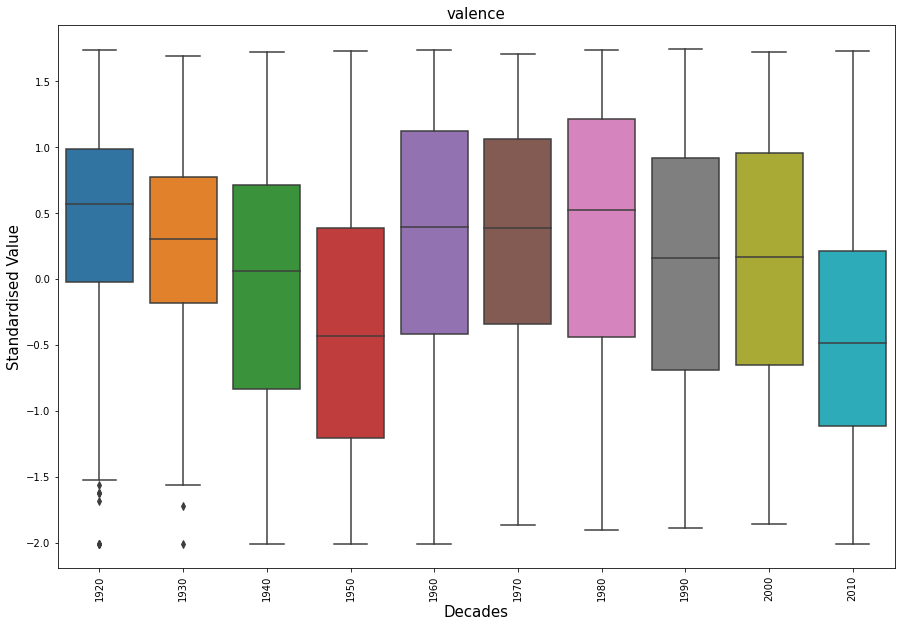

In [36]:
plt.figure(figsize=(15,10))
feature = df_TP.columns[12]
data = df_TP[[feature ,'decade']]
ax = sns.boxplot(x="decade", y=feature, data=data)
plt.xticks(rotation=90);
ax.set_title(feature , fontsize = 15)
ax.set_xlabel('Decades' , fontsize=15)
ax.set_ylabel('Standardised Value' , fontsize=15)

### 2.2 Mean feature distribution for songs across decades (True Positives)

In [37]:
def getFeaturesMean(data):
    decade = data.decade.unique()
    for x , yr in enumerate(decade):
        temp1 = data[data.decade == yr].describe()
        temp1 = temp1.iloc[1].to_frame()
        temp1.rename(columns = {'mean': yr}, inplace = True)
        if x == 0:
            temp = temp1.copy()
        else:
            temp = pd.merge(temp , temp1 , right_index = True , left_index = True)
    
    temp = temp.drop(index = 'decade')
    temp = temp.T.reset_index().rename(columns={'index': 'decade'})
    return temp

df_mean = getFeaturesMean(df_TP)

In [38]:
df_mean = pd.melt(df_mean ,id_vars=["decade"], var_name="features", value_name='value').sort_values('decade')
df_mean['decade'] = df_mean['decade'].astype(str)
df_mean = df_mean[(df_mean['features'] != 'prediction') & (df_mean['features'] != 'key')]

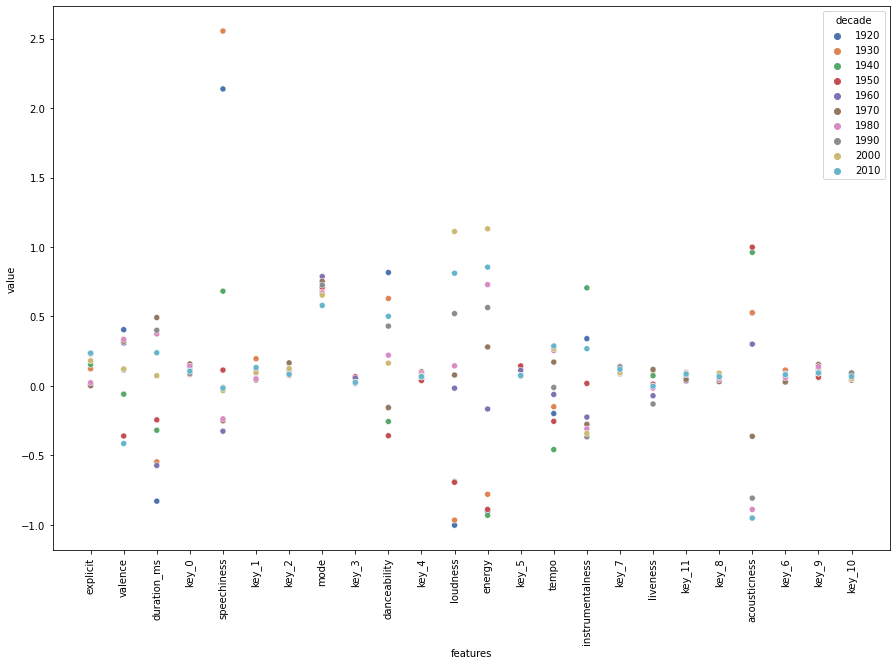

In [39]:
#Show the songs characteristics across each decade
plt.figure(figsize=(15,10))
sns.scatterplot(data=df_mean, x="features", y="value", hue="decade" ,palette="deep")
plt.xticks(rotation=90);

### 2.3 Mean feature distribution for songs across in 1900s vs 2000s

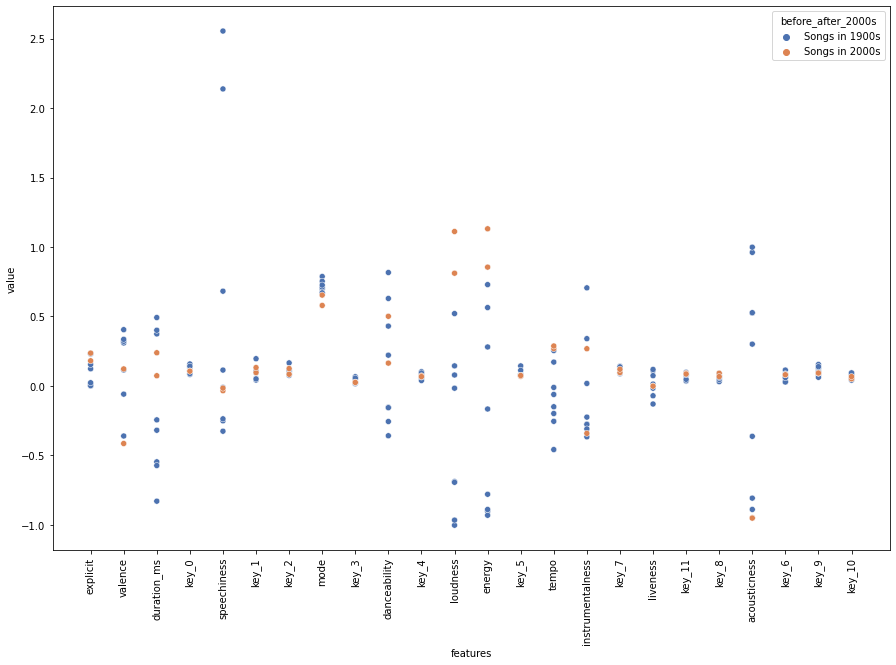

In [40]:
df_mean['decade'] = df_mean['decade'].astype(int)
df_mean['before_after_2000s']= np.where(df_mean['decade'] >= 2000 , 'Songs in 2000s' , 'Songs in 1900s')
plt.figure(figsize=(15,10))
sns.scatterplot(data=df_mean, x="features", y="value", hue="before_after_2000s" ,palette="deep")
plt.xticks(rotation=90);

### 2.4 Extra EDA (Checking relationship between True Positives and popularity)

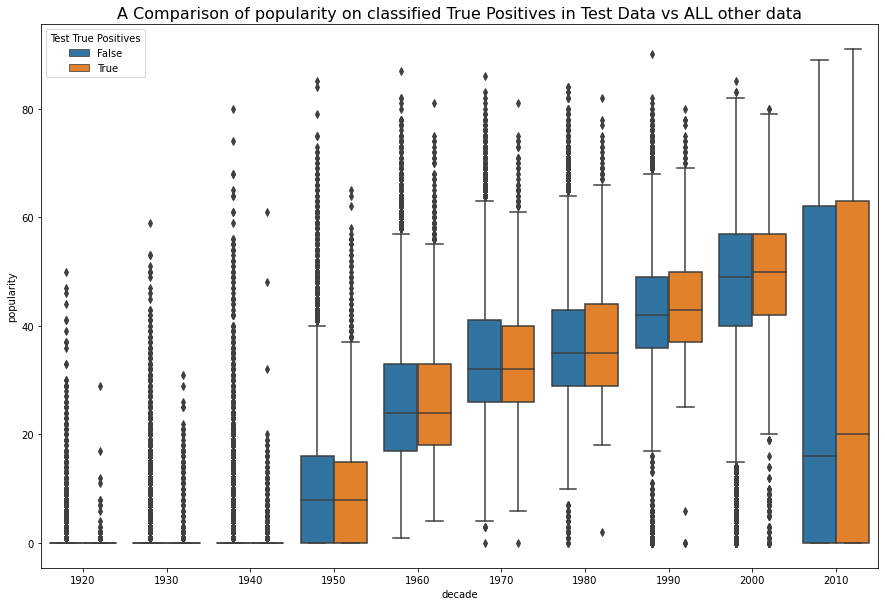

In [41]:
fig, axs = plt.subplots(1,1, figsize=(15,10))
sns.boxplot(x=labels,y=popularity, hue=df_data['Test True Positives'], ax=axs);
# sns.lineplot(x=labels.iloc[df_TP.index],y=popularity.iloc[df_TP.index], ax=axs[1]);

plt.title('A Comparison of popularity on classified True Positives in Test Data vs ALL other data', fontsize=16);

### 2.5 Getting the True Test Positive Centroids

In [42]:
df_mean = getFeaturesMean(df_TP)

df_mean.sort_values('decade', inplace=True)

df_mean = df_mean.reset_index(drop=True)

df_data_annoy = df_data.drop(columns='Test True Positives')

df_mean_sim = df_mean.drop(columns=['decade', 'prediction'])

original = pd.read_csv('data/cleaned_data_wo_genres.csv')

### 2.6 Build Annoy Nearest Neighbor Model (chosen for dot product similarity measure)

In [43]:
f = 25
t = annoy.AnnoyIndex(f, 'dot')
for i in range(df_data_annoy.shape[0]):
    t.add_item(i, df_data_annoy.iloc[i].values)
    
t.build(15)

labels.iloc[t.get_nns_by_item(0, 1000)]

24788     1940
55887     1960
15616     1940
15770     1940
34339     1950
          ... 
46860     1950
115003    1990
58323     1960
28803     1940
136376    2010
Name: decade, Length: 1000, dtype: int64

In [44]:
# t.save('annoy_rec1.ann')

### 2.6.1 Comparing Decade counts of 100 nearest neighbors with True Test Positive Centroids

In [45]:
sim_list = []
for i in range(df_mean.shape[0]):
#     print(df_mean.decade[i])
    sim_list.append(labels.iloc[t.get_nns_by_vector(df_mean_sim.iloc[i].values, 
                                                     100)
                               ].value_counts())

In [46]:
decades = df_mean.sort_values('decade').decade

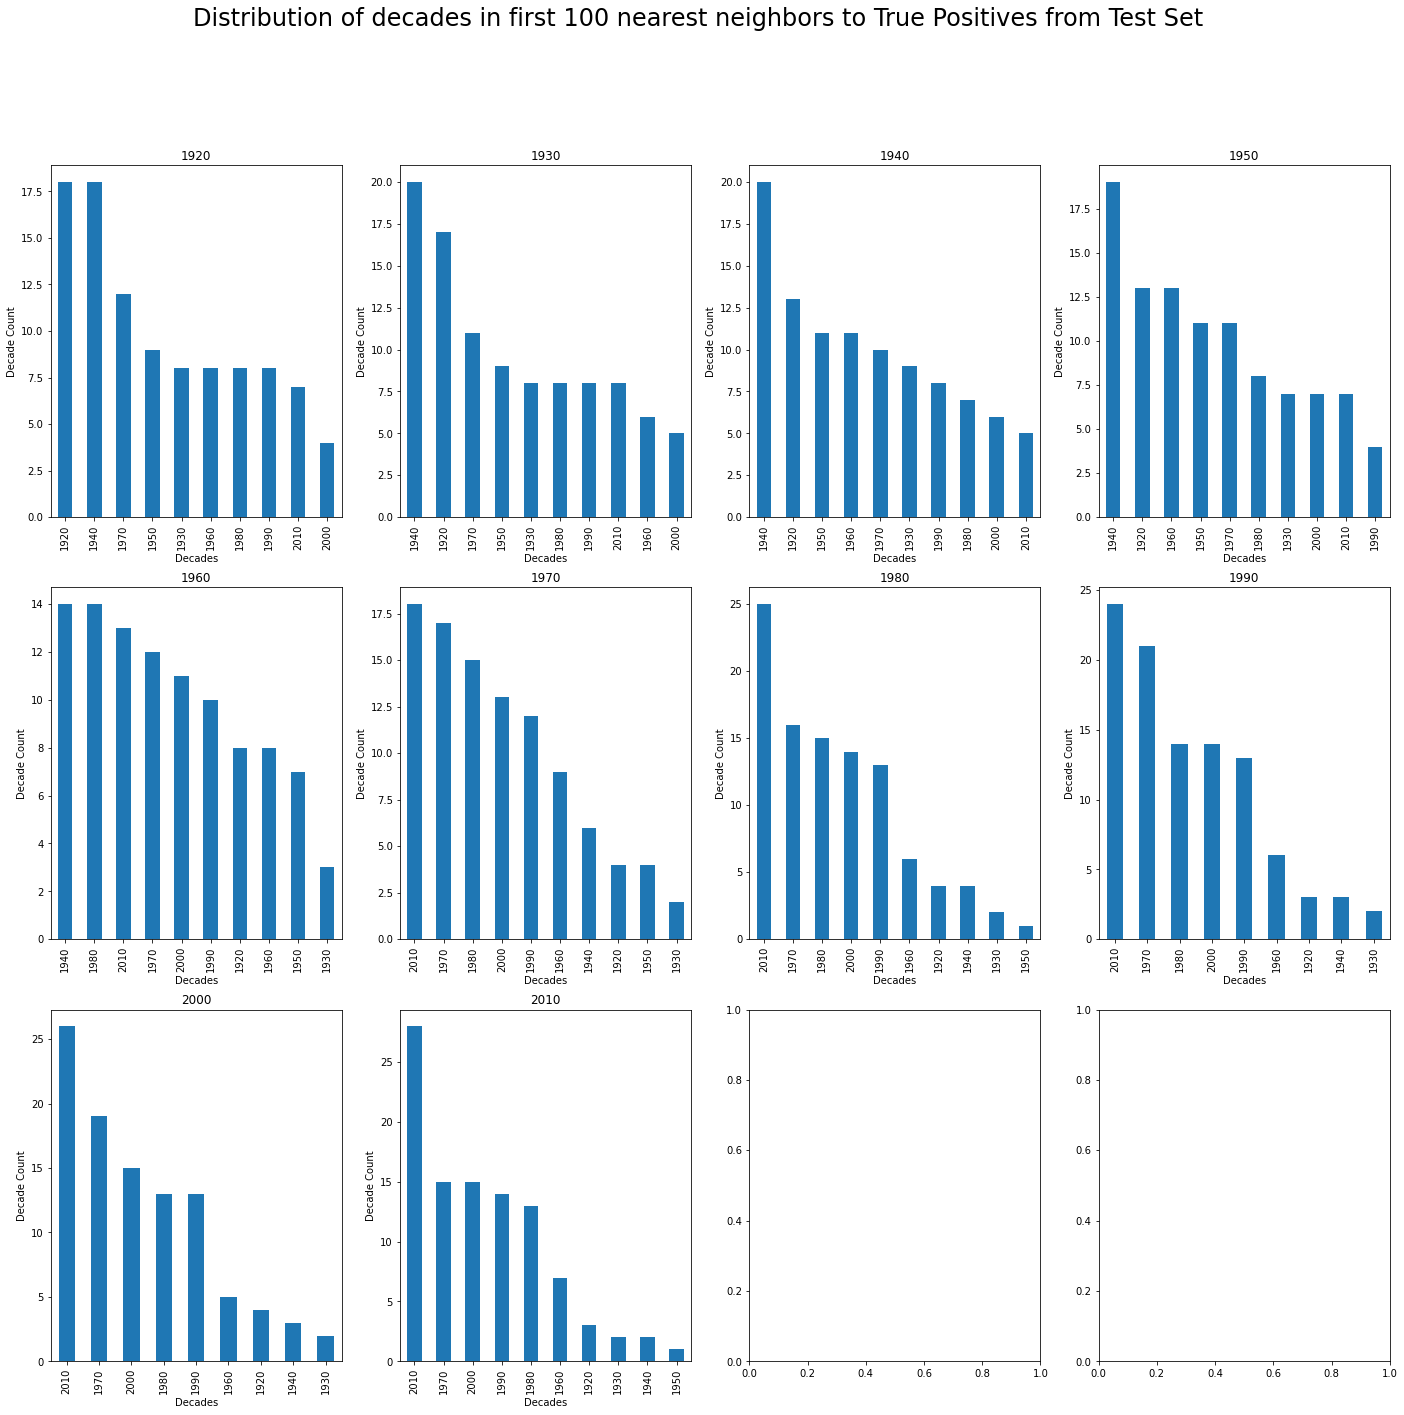

In [47]:
fig, axs = plt.subplots(3,4, figsize=(24,22))

for i in range(len(sim_list)):
    sim_list[i].plot(kind='bar', ax=axs[i//4][i%4])
    axs[i//4][i%4].set_title(f'{df_mean.decade[i]}')
    axs[i//4][i%4].set_xlabel('Decades')
    axs[i//4][i%4].set_ylabel('Decade Count')

plt.suptitle('Distribution of decades in first 100 nearest neighbors to True Positives from Test Set',
                fontsize=24);

### 2.6.2 Analysis with Global Centroids

In [48]:
df_data_glo = df_data_main.copy()
df_data_glo = df_data_glo[df_data_glo.decade != 2020]
labels = df_data_glo['decade']
# popularity = df_data['popularity']
df_data_glo = df_data_glo.drop(columns = ['year', 'popularity'])

In [49]:
global_centroids = df_data_glo.groupby('decade').mean()

In [50]:
global_centroids

,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,...,key_2,key_3,key_4,key_5,key_6,key_7,key_8,key_9,key_10,key_11
decade,,,,,,,,,,,,,,,,,,,,,
1920,0.727534,0.344382,-0.515490,-0.846900,0.139147,0.441763,5.306783,0.012624,-0.819406,0.691085,...,0.080620,0.060853,0.059109,0.106202,0.063566,0.104070,0.074225,0.094767,0.081977,0.064922
1930,0.818388,0.128747,-0.387421,-0.737235,0.059537,0.146745,5.141934,0.064191,-0.637116,0.697346,...,0.086771,0.061127,0.064407,0.096412,0.076831,0.105059,0.061922,0.088162,0.072259,0.065600
1940,0.965137,-0.314233,-0.295111,-0.824422,0.076274,0.490564,5.162350,0.055105,-0.594618,0.702061,...,0.099456,0.063037,0.065469,0.101245,0.053377,0.111835,0.071122,0.079350,0.086005,0.061463
1950,0.884087,-0.317076,-0.222332,-0.711600,0.008430,0.121737,5.060046,-0.004352,-0.519101,0.715762,...,0.094746,0.067606,0.052975,0.131622,0.038072,0.122484,0.084303,0.070815,0.092298,0.037474
1960,0.340244,-0.244236,-0.256316,-0.249741,0.000613,-0.097464,5.095604,-0.025288,-0.153712,0.755418,...,0.111483,0.050755,0.073597,0.118057,0.032871,0.131261,0.062900,0.103850,0.077052,0.041674
1970,-0.249877,-0.068872,0.235916,0.174468,0.003467,-0.229150,5.112940,0.019566,0.047527,0.741263,...,0.145082,0.026529,0.093621,0.084485,0.037316,0.133579,0.037371,0.141670,0.051461,0.059002
1980,-0.511646,0.037648,0.290134,0.396075,0.023576,-0.203449,5.265436,-0.041889,0.070823,0.708538,...,0.124796,0.027442,0.094795,0.079604,0.048895,0.127137,0.046227,0.131983,0.054067,0.074268
1990,-0.488405,0.151554,0.263732,0.361359,0.116896,-0.212385,5.335812,-0.086147,0.285339,0.719537,...,0.108380,0.032498,0.081272,0.081649,0.059229,0.132794,0.056050,0.109620,0.072487,0.069307
2000,-0.611390,0.160768,0.148438,0.656632,0.130230,-0.187744,5.258185,0.006687,0.700478,0.684296,...,0.108620,0.030222,0.081648,0.081810,0.063450,0.117638,0.066943,0.100739,0.063937,0.075798


### 2.6.2.1 Comparing Decade counts of 100 nearest neighbors with Global Centroids

In [51]:
sim_list_global = []
for i in range(global_centroids.shape[0]):
    print(global_centroids.index[i])
    sim_list_global.append(labels.iloc[t.get_nns_by_vector(global_centroids.iloc[i].values, 
                                                     100)
                               ].value_counts())

1920
1930
1940
1950
1960
1970
1980
1990
2000
2010


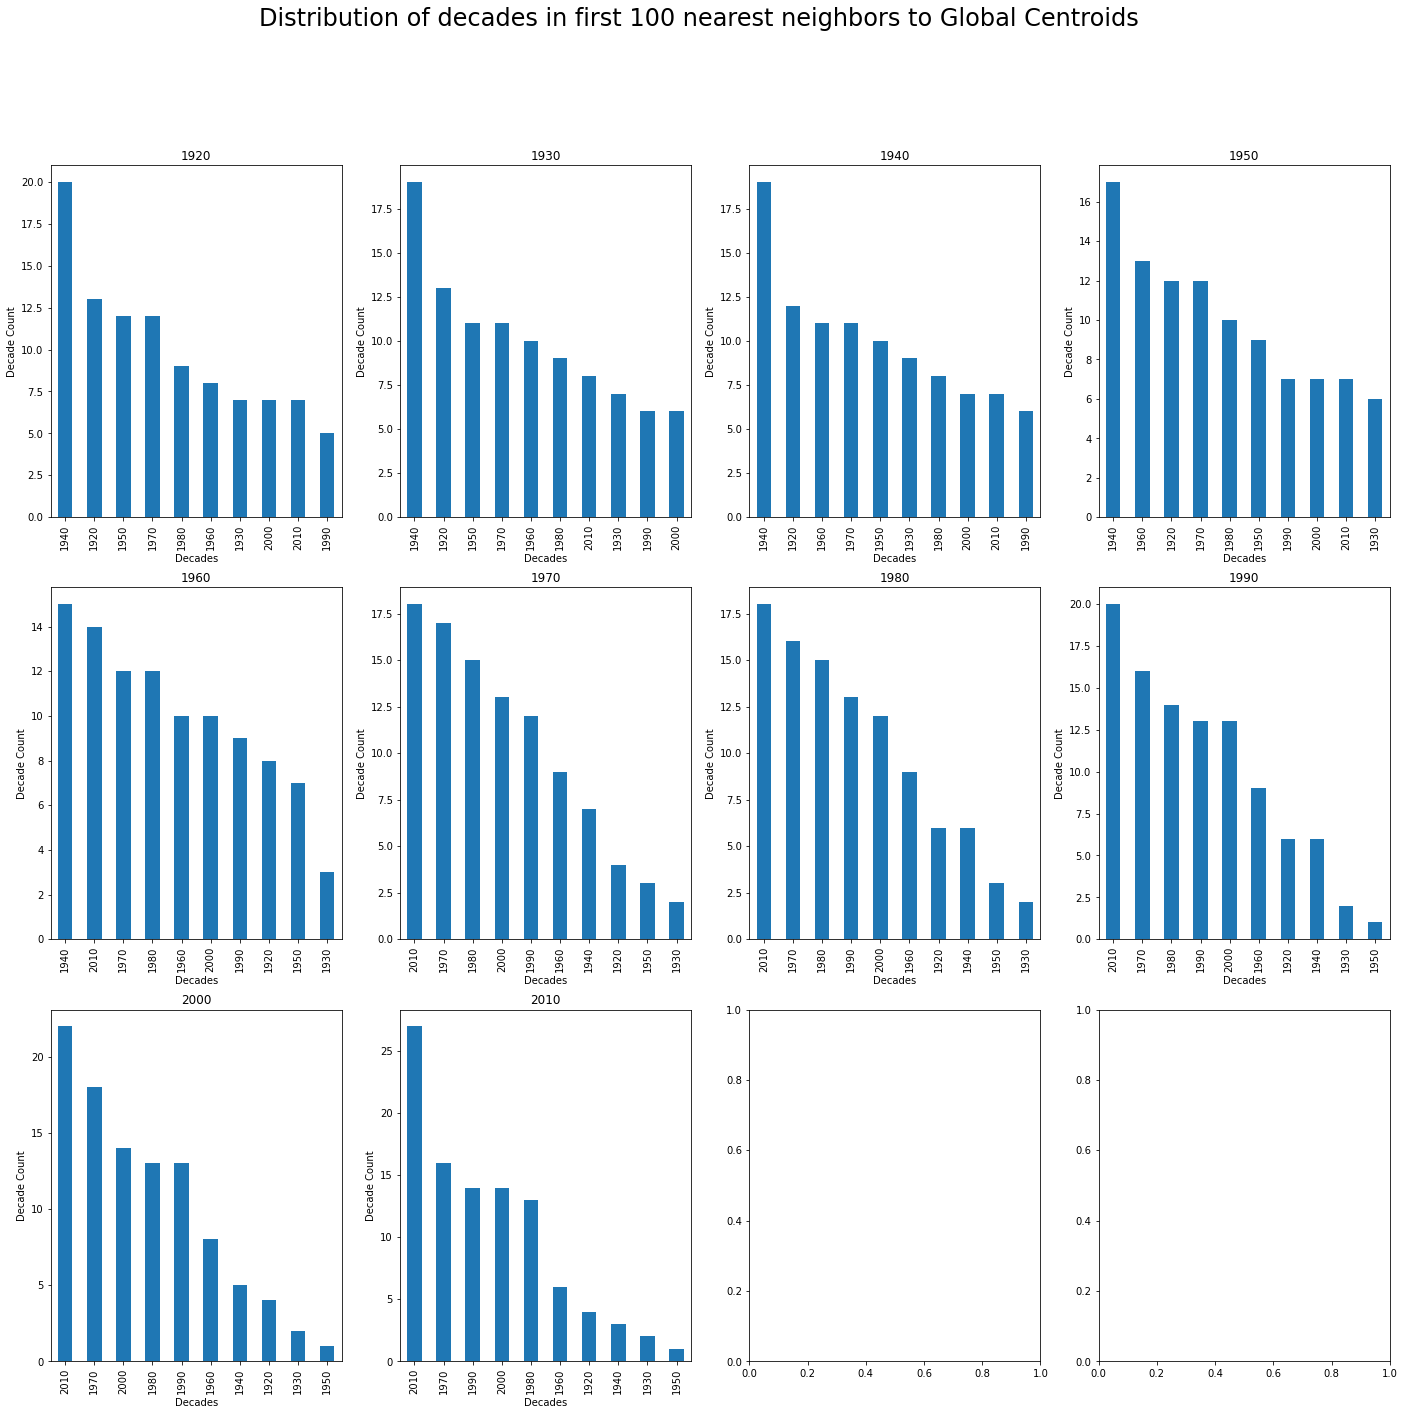

In [52]:
fig, axs = plt.subplots(3,4, figsize=(24,22))

for i in range(len(sim_list_global)):
    sim_list_global[i].plot(kind='bar', ax=axs[i//4][i%4])
    axs[i//4][i%4].set_title(f'{global_centroids.index[i]}')
    axs[i//4][i%4].set_xlabel('Decades')
    axs[i//4][i%4].set_ylabel('Decade Count')
    
plt.suptitle('Distribution of decades in first 100 nearest neighbors to Global Centroids', fontsize=24);

## 3. Artist Analysis

In [53]:
df_data_main['artists_count'] = df_data_main['artists'].apply(lambda x: len(x.split(",")))

In [54]:
df_decade_unique_artists = df_data_main.groupby(df_data_main['decade'], as_index=False)['artists'].apply(lambda x: len(list(np.unique(x))))
df_decade_unique_artists

,decade,artists
0,1920,716
1,1930,1710
2,1940,3434
3,1950,4353
4,1960,2631
5,1970,2884
6,1980,3862
7,1990,5707
8,2000,5098
9,2010,9546


In [55]:
df_data_decade_count = df_data_main.groupby(df_data_main['decade']).count()
df_data_decade_count = df_data_decade_count.reset_index()
df_data_decade_count = df_data_decade_count[['decade', 'acousticness']]
df_data_decade_count = df_data_decade_count.rename(columns={'acousticness':'count'})
df_data_decade_count

,decade,count
0,1920,5160
1,1930,10061
2,1940,13976
3,1950,18386
4,1960,17949
5,1970,18169
6,1980,18366
7,1990,18555
8,2000,12309
9,2010,19903


In [56]:
df_data_decade_count = df_data_decade_count.join(df_decade_unique_artists, lsuffix='_a', rsuffix='b')
df_data_decade_count = df_data_decade_count.drop(['decade_a'], axis=1)

In [57]:
df_data_decade_count['avg_song_per_artist'] = df_data_decade_count['count'] / df_data_decade_count['artists']
df_data_decade_count = df_data_decade_count.rename(columns={'decadeb': 'decade'})

df_data_decade_count

,count,decade,artists,avg_song_per_artist
0,5160,1920,716,7.206704
1,10061,1930,1710,5.883626
2,13976,1940,3434,4.069889
3,18386,1950,4353,4.223754
4,17949,1960,2631,6.822121
5,18169,1970,2884,6.299931
6,18366,1980,3862,4.755567
7,18555,1990,5707,3.251270
8,12309,2000,5098,2.414476
9,19903,2010,9546,2.084957


In [58]:
xgb_df = xgb_df.transpose()
xgb_df.drop(xgb_df.tail(3).index, inplace=True)
xgb_df = xgb_df.reset_index()

In [59]:
lgbm_df = lgbm_df.transpose()
lgbm_df.drop(lgbm_df.tail(3).index, inplace=True)
lgbm_df = lgbm_df.reset_index()

In [60]:
rf_df = rf_df.transpose()
rf_df.drop(rf_df.tail(3).index, inplace=True)
rf_df = rf_df.reset_index()

In [61]:
df_data_decade_count = df_data_decade_count.join(xgb_df['f1-score']).rename(columns={'f1-score': 'xgb_f1'})
df_data_decade_count = df_data_decade_count.join(lgbm_df['f1-score']).rename(columns={'f1-score': 'lgbm_f1'})
df_data_decade_count = df_data_decade_count.join(rf_df['f1-score']).rename(columns={'f1-score': 'rf_f1'})

In [62]:
df_data_decade_count

,count,decade,artists,avg_song_per_artist,xgb_f1,lgbm_f1,rf_f1
0,5160,1920,716,7.206704,0.578300,0.570474,0.593954
1,10061,1930,1710,5.883626,0.498467,0.506530,0.510128
2,13976,1940,3434,4.069889,0.473897,0.486983,0.483411
3,18386,1950,4353,4.223754,0.436394,0.431073,0.445006
4,17949,1960,2631,6.822121,0.425373,0.432439,0.430364
5,18169,1970,2884,6.299931,0.399047,0.392871,0.383944
6,18366,1980,3862,4.755567,0.407692,0.404837,0.410409
7,18555,1990,5707,3.251270,0.364633,0.355863,0.352637
8,12309,2000,5098,2.414476,0.312747,0.314484,0.304919
9,19903,2010,9546,2.084957,0.591498,0.583704,0.587444


In [63]:
df_data_decade_count['diversity'] = 1 / df_data_decade_count['avg_song_per_artist']

Text(0.5, 1.0, 'Artist diversity against RF F1 score')

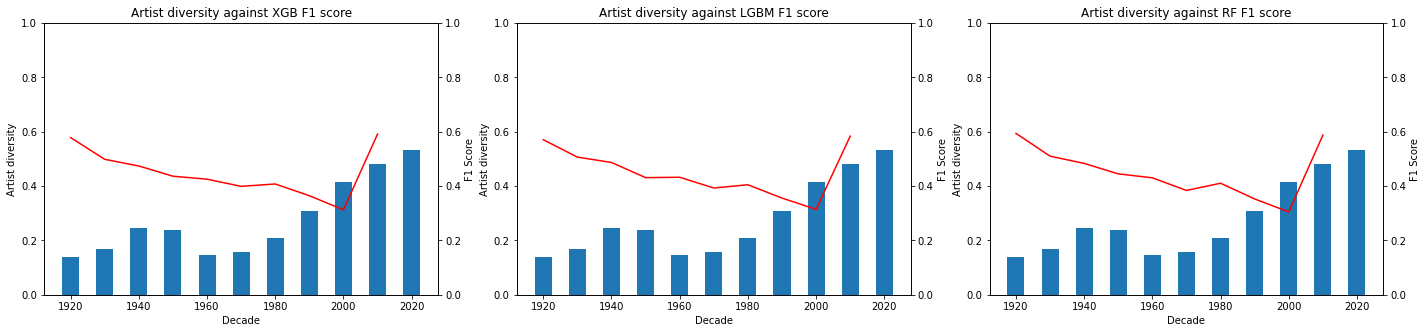

In [64]:
fig, ax = plt.subplots(1, 3, figsize=(24, 5))

ax[0].bar(df_data_decade_count['decade'], df_data_decade_count['diversity'], width=5)

ax1_2 = ax[0].twinx()
ax1_2.plot(df_data_decade_count['decade'], df_data_decade_count['xgb_f1'], color='red')
ax1_2.set_ylim([0,1])
ax1_2.set_ylabel('F1 Score')
ax[0].set_ylim([0,1])
ax[0].set_xlabel('Decade')
ax[0].set_ylabel('Artist diversity')
ax[0].set_title("Artist diversity against XGB F1 score")

ax[1].bar(df_data_decade_count['decade'], df_data_decade_count['diversity'], width=5)

ax2_2 = ax[1].twinx()
ax2_2.plot(df_data_decade_count['decade'], df_data_decade_count['lgbm_f1'], color='red')
ax2_2.set_ylim([0,1])
ax2_2.set_ylabel('F1 Score')
ax[1].set_ylim([0,1])
ax[1].set_xlabel('Decade')
ax[1].set_ylabel('Artist diversity')
ax[1].set_title("Artist diversity against LGBM F1 score")

ax[2].bar(df_data_decade_count['decade'], df_data_decade_count['diversity'], width=5)

ax3_2 = ax[2].twinx()
ax3_2.plot(df_data_decade_count['decade'], df_data_decade_count['rf_f1'], color='red')
ax3_2.set_ylim([0,1])
ax3_2.set_ylabel('F1 Score')
ax[2].set_ylim([0,1])
ax[2].set_xlabel('Decade')
ax[2].set_ylabel('Artist diversity')
ax[2].set_title("Artist diversity against RF F1 score")

## 4. Extra Modelling -> Eras 1990's and 2000's

### 4.1 Untreated Data

In [65]:
df_data = df_data_main.copy()
#df_data = df_data.drop(columns = ['artists' , 'id' , 'name' , 'genres', 'release_date'])
df_data['decade'] = np.where(df_data['year'] < 2000  , 1900 , 2000)

# rand_under = RandomUnderSampler(sampling_strategy='majority')

labels = df_data['decade']
df_data = df_data.drop(columns = ['year' , 'decade', 'popularity', 'artists'])
#df_data = (df_data - df_data.mean()) / (df_data.std())   

X_train, X_test, y_train, y_test = train_test_split(df_data, labels, test_size=0.20, random_state=2)
# X_train, y_train = rand_under.fit_resample(X_train, y_train)

model_lgbm = lgbm.LGBMClassifier(random_state=2)
model_lgbm.fit(X_train, y_train)
model_lgbm.score(X_test, y_test)
y_pred = model_lgbm.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

        1900       0.89      0.95      0.92     24118
        2000       0.79      0.61      0.69      7303

    accuracy                           0.87     31421
   macro avg       0.84      0.78      0.81     31421
weighted avg       0.87      0.87      0.87     31421



### 4.2 Undersampled Data

In [66]:
df_data = df_data_main.copy()
#df_data = df_data.drop(columns = ['artists' , 'id' , 'name' , 'genres', 'release_date'])
df_data['decade'] = np.where(df_data['year'] < 2000  , 1900 , 2000)

rand_under = RandomUnderSampler(sampling_strategy='majority')

labels = df_data['decade']
df_data = df_data.drop(columns = ['year' , 'decade', 'popularity', 'artists'])
#df_data = (df_data - df_data.mean()) / (df_data.std())   

X_train, X_test, y_train, y_test = train_test_split(df_data, labels, test_size=0.20, random_state=2)
X_train, y_train = rand_under.fit_resample(X_train, y_train)

model_lgbm = lgbm.LGBMClassifier(seed=2)
model_lgbm.fit(X_train, y_train)
model_lgbm.score(X_test, y_test)
y_pred = model_lgbm.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

        1900       0.93      0.84      0.88     24118
        2000       0.60      0.81      0.69      7303

    accuracy                           0.83     31421
   macro avg       0.77      0.82      0.79     31421
weighted avg       0.86      0.83      0.84     31421



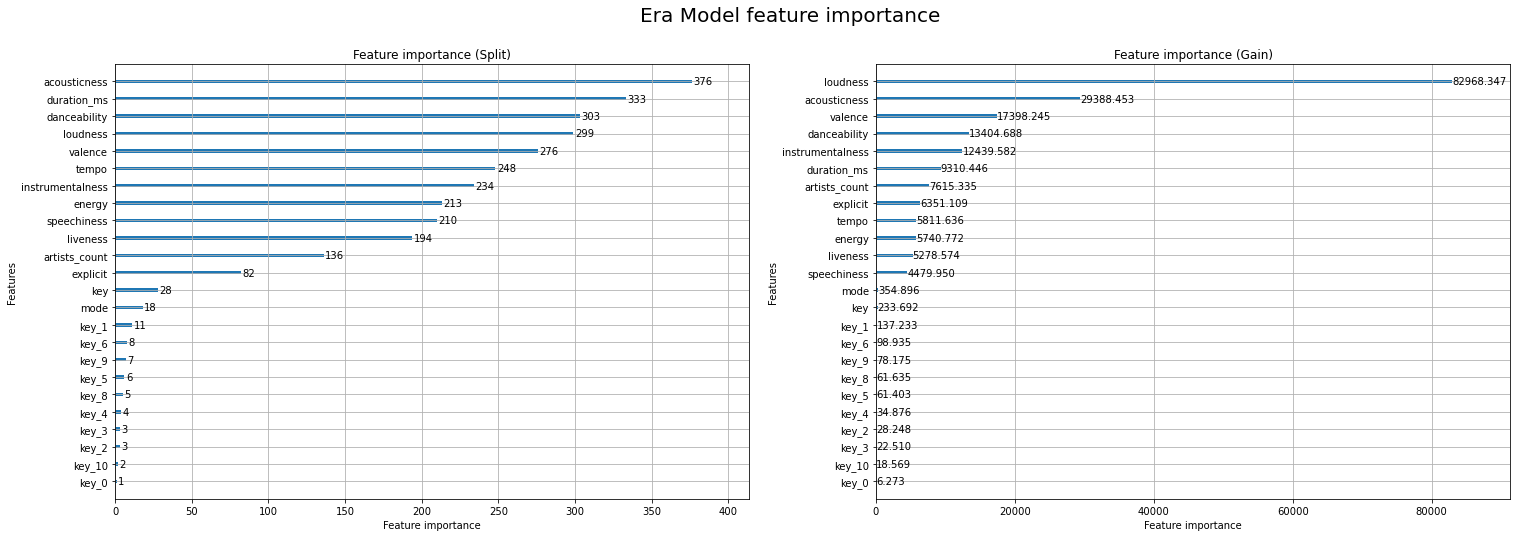

In [67]:
fig, axs = plt.subplots(1,2, figsize=(25,8))
# fig, axs = plt)
fig.suptitle('Era Model feature importance', fontsize=20)
lgbm.plot_importance(model_lgbm,axs[0], importance_type='split', title='Feature importance (Split)');
lgbm.plot_importance(model_lgbm,axs[1], importance_type='gain', title='Feature importance (Gain)');